In [44]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import matplotlib.pyplot as plt
import time

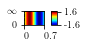

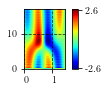

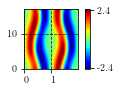

In [45]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks()
td[0].plot()
td[1].plot()
td[2].plot()

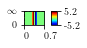

In [24]:
read_h5('OrbitKS_streak.h5', directory='../data/tiles/padded_space_unpadded_time/').plot()

In [37]:
td[0] = read_h5('OrbitKS_streak_shifted.h5', directory='../data/tiles/padded_space_unpadded_time/', basis='field')

In [38]:
td

{0: OrbitKS({"basis": "field", "parameters": ["0.0", "6.3906", "0"], "field_shape": ["64", "64"]}),
 1: OrbitKS({"basis": "field", "parameters": ["17.1462", "13.0196", "0"], "field_shape": ["64", "64"]}),
 2: OrbitKS({"basis": "field", "parameters": ["17.1462", "17.5907", "0"], "field_shape": ["64", "64"]})}

In [39]:
np.matrix(np.array([[0, 1, 2], [2, 2, 2], [1, 0, 0]]))

matrix([[0, 1, 2],
        [2, 2, 2],
        [1, 0, 0]])

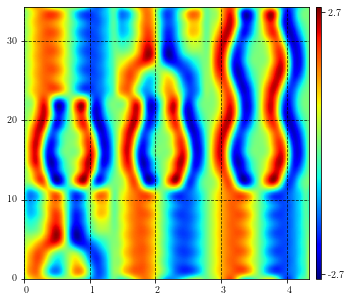

In [46]:
# td = tile_dictionary_ks()
symbol_array = np.array([[0, 1, 2], [2, 2, 2], [1, 0, 0]])
tiled_orbit = rediscretize(tile(symbol_array, td, OrbitKS, stripwise=True))
tiled_orbit.plot(figsize=(5,5))

In [51]:
result = converge(tiled_orbit, verbose=True)

Starting gradient descent. Initial residual=10946.797657264895, target=2.048e-06, max_iter=23040
#
Insufficient residual decrease. Exiting with residual 112.34957585876421


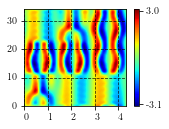

In [52]:
result.orbit.plot()

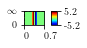

In [48]:
read_h5('OrbitKS_streak.h5', directory='../data/tiles/padded_space_unpadded_time/').plot()

In [10]:
?tile

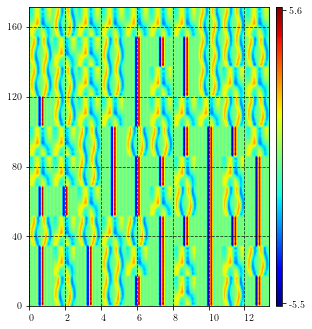

In [42]:
np.random.seed(0)
symbol_array = (3*np.random.rand(10,10)).astype(int)
t0 = time.time()
tiled_orbit = rediscretize(tile(symbol_array, td, OrbitKS, stripwise=False, gluing_order=(1,0)))
tiled_orbit.plot()

In [43]:
tiled_orbit

OrbitKS({"basis": "field", "parameters": ["171.4619", "118.9247", "0"], "field_shape": ["128", "128"]})

In [ ]:
orbit0 = read_h5('OrbitKS_L31p245_T46p754.h5', data_format='orbithunter_old')
orbit1 = read_h5('OrbitKS_L26p931_T41p266.h5', data_format='orbithunter_old')
orbit2 = read_h5('OrbitKS_L37p297_T79p778.h5', data_format='orbithunter_old')
orbit3 = read_h5('OrbitKS_L27p038_T23p329.h5', data_format='orbithunter_old')

In [ ]:
tile_dict = {0: orbit0, 1: orbit1, 2: orbit2, 3: orbit3}

In [ ]:
tile_dict = rediscretize_tiling_dictionary(tile_dict, new_shape=(16,16))

In [ ]:
np.random.seed(0)
symbol_array = (4*np.random.rand(5,5)).astype(int)
symbol_array

In [ ]:
tile(symbol_array, tile_dict, OrbitKS).plot()

In [ ]:
td = tile_dictionary_ks(padded=True, comoving=False)
td = rediscretize_tiling_dictionary(td, new_shape=(8,8))
np.random.seed(0)
symbol_array = (3*np.random.rand(201,177)).astype(int)
huge_tiling = tile(symbol_array, td, OrbitKS)
huge_tiling.plot()

In [ ]:
zoom_in = clip(tiled_orbit, ((0, 100), (0,10)))

In [ ]:
zoom_in.plot()

In [ ]:
huge_tiling_result = converge(huge_tiling, method='gradient_descent', orbit_maxiter=1000, verbose=True)
huge_orbit = huge_tiling_result.orbit

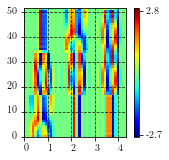

In [29]:
tiled_orbit.plot(padding=False)